In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns


In [3]:
df.keys()

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'REFERENCE', 'CRUISE ID', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       ...
       'ZR', 'TI.1', 'AS.2', 'AS.3', 'GER.1', 'H2O_M.1', 'H2O_P.1', 'H2O_M.2',
       'H2O_P.2', 'INDIUM.1'],
      dtype='object', length=151)

In [4]:
df

SAMPLE ID  IGSN  SOURCE  \
0      080385-4   NaN  GEOROC   
1      230483-3   NaN  GEOROC   
2      PU-02-34   NaN  GEOROC   
3      PU-02-25   NaN  GEOROC   
4      PU-02-20   NaN  GEOROC   
...         ...   ...     ...   
3058  DBF-03-05   NaN  GEOROC   
3059    DBF04-6   NaN  GEOROC   
3060    DBF04-5   NaN  GEOROC   
3061    CHO 099   NaN  GEOROC   
3062    LAU-2/2   NaN  GEOROC   

                                              REFERENCE CRUISE ID  LATITUDE  \
0     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
1     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
2     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5088   
3     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5275   
4     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5675   
...                                                 ...       ...       ...   
3058       HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007       NaN  -18.1958   
3059  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...       NaN  -18.1928   
3060  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...       NaN  -18.1929   
3061          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.3014   
3062          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2667   

      LONGITUDE  LOC PREC  MIN AGE    AGE  ...     ZR TI.1 AS.2 AS.3 GER.1  \
0      -72.4930      0.01      NaN    NaN  ...  282.0  NaN  NaN  NaN   NaN   
1      -72.4930      0.01      NaN    NaN  ...  195.0  NaN  NaN  NaN   NaN   
2      -72.2060      0.01      NaN    NaN  ...  307.0  NaN  NaN  NaN   NaN   
3      -72.1812      0.01      NaN    NaN  ...  342.0  NaN  NaN  NaN   NaN   
4      -72.1743      0.01      NaN    NaN  ...  308.0  NaN  NaN  NaN   NaN   
...         ...       ...      ...    ...  ...    ...  ...  ...  ...   ...   
3058   -69.2527      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3059   -69.2434      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3060   -69.2433      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3061   -69.2431      0.01      2.6  12.80  ...  101.0  NaN  NaN  NaN   NaN   
3062   -69.3500      0.01      2.6   3.95  ...  150.0  NaN  NaN  NaN   NaN   

      H2O_M.1  H2O_P.1  H2O_M.2  H2O_P.2  INDIUM.1  
0         NaN      NaN      NaN      NaN       NaN  
1         NaN      NaN      NaN      NaN       NaN  
2         NaN      NaN      NaN      NaN       NaN  
3         NaN      NaN      NaN      NaN       NaN  
4         NaN      NaN      NaN      NaN       NaN  
...       ...      ...      ...      ...       ...  
3058      NaN      NaN      NaN      NaN       NaN  
3059      NaN      NaN      NaN      NaN       NaN  
3060      NaN      NaN      NaN      NaN       NaN  
3061      NaN      0.0      NaN      0.0       NaN  
3062      NaN      NaN      NaN      NaN       NaN  

[3063 rows x 151 columns]

In [5]:
# Find number of null values in each column
df.isnull().sum()

SAMPLE ID       0
IGSN         3063
SOURCE          0
REFERENCE       0
CRUISE ID    3052
             ... 
H2O_M.1      2982
H2O_P.1      2900
H2O_M.2      2982
H2O_P.2      2900
INDIUM.1     3060
Length: 151, dtype: int64

In [6]:
# Each row has something that is missing
data_new = df.dropna()
data_new

Empty DataFrame
Columns: [SAMPLE ID, IGSN, SOURCE, REFERENCE, CRUISE ID, LATITUDE, LONGITUDE, LOC PREC, MIN AGE, AGE, MAX AGE, MATERIAL, TYPE, COMPOSITION, ROCK NAME, MINERAL, SIO2, TIO2, AL2O3, CR2O3, FE2O3, FE2O3T, FEO, FEOT, NIO, MNO, MGO, CAO, NA2O, K2O, P2O5, BAO, LOI, H2O, H2O_M, H2O_P, SO3, V2O3, ZNO, FE, MN, NI, CO, CU, CD, ZN, AS, AG, S, AL, CA, MG, SR87_SR86, SR87_SR86_INI, RB87_SR86, ND143_ND144, SM147_ND144, PB206_PB204, PB207_PB204, PB208_PB204, BE10, BE10_BE9, SR87_SR86_INI.1, AR, AR39, AR40, AR38_AR36, AR40_AR36, AR40_AR39, LA, CE, PR, ND, SM, EU, GD, TB, DY, HO, ER, TM, YB, LU, CO2, F, CL, OH, U238_PB204, TH232_PB204, RA, AG.1, AL.1, AS.1, AU, B, BA, BE, BI, BR, C, ...]
Index: []

[0 rows x 151 columns]

In [7]:
df.describe()

IGSN     LATITUDE    LONGITUDE     LOC PREC      MIN AGE          AGE  \
count   0.0  3063.000000  3063.000000  3063.000000  1352.000000  1440.000000   
mean    NaN   -29.436414   -69.961676     0.009968    40.972882    54.259535   
std     NaN     9.817008     2.227382     0.000567   258.564503   320.506284   
min     NaN   -54.800000   -78.518000     0.000010    -0.002000   -19.300000   
25%     NaN   -38.769400   -71.699050     0.010000    -0.000001    -0.000001   
50%     NaN   -26.420000   -70.250000     0.010000     0.010000     1.305000   
75%     NaN   -21.246800   -68.000000     0.010000     2.600000    12.800000   
max     NaN    -6.975000   -64.440000     0.010000  2500.000000  3175.000000   

           MAX AGE  MINERAL         SIO2         TIO2  ...           ZR  \
count  1352.000000      0.0  2140.000000  2137.000000  ...  1647.000000   
mean     66.329437      NaN    69.727827     0.506845  ...   190.392557   
std     396.412106      NaN     4.586499     0.295716  ...   151.644587   
min      -0.000409      NaN    36.782000     0.002000  ...     0.000000   
25%      -0.000001      NaN    66.144000     0.287000  ...   124.000000   
50%       2.600000      NaN    69.327500     0.539000  ...   169.000000   
75%      16.000000      NaN    73.389750     0.659000  ...   221.000000   
max    3850.000000      NaN    85.189000     4.812000  ...  2488.000000   

              TI.1        AS.2        AS.3      GER.1    H2O_M.1     H2O_P.1  \
count   200.000000  239.000000  239.000000  33.000000  81.000000  163.000000   
mean    828.254428   18.374184   18.374184   3.537576   0.562716    0.966994   
std     890.055116   24.401248   24.401248   4.166317   0.535546    0.875199   
min       0.005000    0.000000    0.000000   0.700000   0.000000    0.000000   
25%     655.512500    8.000000    8.000000   1.000000   0.200000    0.210000   
50%     718.700000   12.910000   12.910000   1.600000   0.330000    0.790000   
75%     760.175000   22.175000   22.175000   5.510000   0.750000    1.510000   
max    5000.000000  280.000000  280.000000  20.000000   2.530000    4.860000   

         H2O_M.2     H2O_P.2  INDIUM.1  
count  81.000000  163.000000       3.0  
mean    0.562716    0.966994       0.0  
std     0.535546    0.875199       0.0  
min     0.000000    0.000000       0.0  
25%     0.200000    0.210000       0.0  
50%     0.330000    0.790000       0.0  
75%     0.750000    1.510000       0.0  
max     2.530000    4.860000       0.0  

[8 rows x 133 columns]

# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [8]:
df.dropna(subset=['SIO2'])

SAMPLE ID  IGSN  SOURCE  \
0      080385-4   NaN  GEOROC   
1      230483-3   NaN  GEOROC   
2      PU-02-34   NaN  GEOROC   
3      PU-02-25   NaN  GEOROC   
4      PU-02-20   NaN  GEOROC   
...         ...   ...     ...   
3056    AJO 017   NaN  GEOROC   
3057     AJO017   NaN  GEOROC   
3058  DBF-03-05   NaN  GEOROC   
3061    CHO 099   NaN  GEOROC   
3062    LAU-2/2   NaN  GEOROC   

                                              REFERENCE CRUISE ID  LATITUDE  \
0     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
1     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
2     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5088   
3     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5275   
4     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5675   
...                                                 ...       ...       ...   
3056          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2167   
3057  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....       NaN  -18.2458   
3058       HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007       NaN  -18.1958   
3061          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.3014   
3062          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2667   

      LONGITUDE  LOC PREC  MIN AGE    AGE  ...     ZR TI.1 AS.2 AS.3 GER.1  \
0      -72.4930      0.01      NaN    NaN  ...  282.0  NaN  NaN  NaN   NaN   
1      -72.4930      0.01      NaN    NaN  ...  195.0  NaN  NaN  NaN   NaN   
2      -72.2060      0.01      NaN    NaN  ...  307.0  NaN  NaN  NaN   NaN   
3      -72.1812      0.01      NaN    NaN  ...  342.0  NaN  NaN  NaN   NaN   
4      -72.1743      0.01      NaN    NaN  ...  308.0  NaN  NaN  NaN   NaN   
...         ...       ...      ...    ...  ...    ...  ...  ...  ...   ...   
3056   -69.2125      0.01      2.6  12.80  ...   73.0  NaN  NaN  NaN   NaN   
3057   -69.2194      0.01      NaN    NaN  ...  121.0  NaN  NaN  NaN   NaN   
3058   -69.2527      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3061   -69.2431      0.01      2.6  12.80  ...  101.0  NaN  NaN  NaN   NaN   
3062   -69.3500      0.01      2.6   3.95  ...  150.0  NaN  NaN  NaN   NaN   

      H2O_M.1  H2O_P.1  H2O_M.2  H2O_P.2  INDIUM.1  
0         NaN      NaN      NaN      NaN       NaN  
1         NaN      NaN      NaN      NaN       NaN  
2         NaN      NaN      NaN      NaN       NaN  
3         NaN      NaN      NaN      NaN       NaN  
4         NaN      NaN      NaN      NaN       NaN  
...       ...      ...      ...      ...       ...  
3056      NaN     0.79      NaN     0.79       NaN  
3057      NaN      NaN      NaN      NaN       NaN  
3058      NaN      NaN      NaN      NaN       NaN  
3061      NaN     0.00      NaN     0.00       NaN  
3062      NaN      NaN      NaN      NaN       NaN  

[2140 rows x 151 columns]

In [9]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns


Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

# heatmap 
For starters, we see that with silica, we have high negative correlations with TiO2, Al203, FeoT, MgO, and CaO

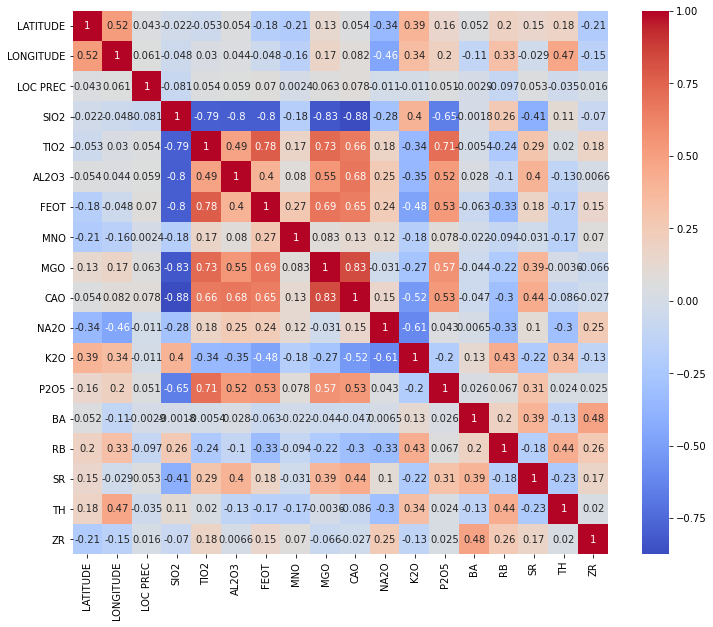

In [10]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

Mini Test:
- Took the paper with the most samples as a target and saw if we could identify the most informative features looking at the 
- 5 negative correlated features
- Change target to 1 and 0


In [11]:
data_baby = df
target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          ' ':0}

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)

data_baby = data_baby.dropna()

<ipython-input-11-7ba77ca34718>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE'].map(target)
<ipython-input-11-7ba77ca34718>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].fillna(0)


In [12]:
# Get 5 most informative features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 42)
#Transforming data using RFE


X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]
y = data_baby['target']


X

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


SIO2   TIO2   AL2O3   FEOT    MGO    CAO   NA2O
0     69.144  0.565  14.590  4.261  1.111  3.544  4.402
1     63.541  0.796  16.427  5.973  1.732  5.136  4.562
2     70.931  0.340  13.794  4.671  0.310  1.771  5.182
3     70.047  0.688  14.039  4.367  0.638  2.154  5.195
4     69.367  0.531  14.150  5.167  0.471  2.213  5.167
...      ...    ...     ...    ...    ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.185  0.893  3.880
3056  74.796  0.274  13.367  1.418  0.478  1.078  3.680
3057  75.237  0.258  13.388  1.419  0.381  1.051  3.545
3061  66.728  0.555  17.025  3.542  0.807  3.845  4.087
3062  75.179  0.129  13.810  0.850  0.145  1.007  3.738

[1161 rows x 7 columns]

In [13]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3055    0.0
3056    1.0
3057    0.0
3061    1.0
3062    1.0
Name: target, Length: 1161, dtype: float64

In [14]:
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [15]:
# # of features
nof_list=np.arange(1,7)            
high_score=0

# Store the optimum features
nof=0          
score_list =[]

In [16]:
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size = 0.3,
                                                        random_state = 42)
    
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

# Optimum features is 4
# but score is extremely weak... But is this due to the negative correlation? or that this method is trash?

Optimum number of features: 4
Score with 4 features: 0.060039


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as

In [17]:
# List the 5 best features in a row

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MGO', 'CAO', 'NA2O'], dtype='object')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


- Silica is required for igneous rocks so this looks good. 
- TiO2 is a trace metal that doesn't like moving from rocks easily so this also makes sense
- AL2O3 is also required for igneous rocks so this looks good. Slightly interesting that this is after TiO2

# How to plot values on a map

In [18]:
#import geopandas
#from shapely.geos import lgeos
#import fiona
#from shapely.geometry import Polygon

#import geoplot

In [19]:
# Sample dataset with long lat to plot

data_new = df[:5]

# select multiple columns
data_new = data_new.loc[:5,['LATITUDE', 'LONGITUDE', 'ZR']]
print(data_new)


   LATITUDE  LONGITUDE     ZR
0  -41.1000   -72.4930  282.0
1  -41.1000   -72.4930  195.0
2  -40.5088   -72.2060  307.0
3  -40.5275   -72.1812  342.0
4  -40.5675   -72.1743  308.0


In [20]:
#gdf = geopandas.GeoDataFrame(data_new, geometry=geopandas.points_from_xy(data_new['LONGITUDE'],data_new['LATITUDE']))
#print(gdf.head)

In [21]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'South America'].plot(
#    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')

#plt.show()

# Choosing a Classifications

# PCA

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify = y)

In [23]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [24]:
pca = PCA(n_components = 7) # <4 good, obvi 7 is the best

X_yes = pca.fit_transform(X_stand)

pca.explained_variance_ratio_.sum()

1.0

# ~ New Test ~
- It can find one sample set out of all samples with just 3 features pretty well. 
- Now, what if we change the target to include top 20 references, can we still predit our samples very well

In [25]:
data_baby = df 

data_baby['target']= data_baby['REFERENCE']

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
#data_baby['target'] = data_baby['target'].dropna(data_baby['target'].value_counts(<3))

data_baby['target'].value_counts()
data_baby['target'].value_counts()[:20] # top 20)

data_baby = data_baby.dropna()

<ipython-input-25-590b95870c7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE']


In [26]:
#X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]
#y = data_baby['target'].value_counts()[:20]

data_baby = data_baby.dropna()
data_baby

SAMPLE ID  SOURCE                                          REFERENCE  \
0     080385-4  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
1     230483-3  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
2     PU-02-34  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
3     PU-02-25  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
4     PU-02-20  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
...        ...     ...                                                ...   
3055    RIG187  GEOROC  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....   
3056   AJO 017  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3057    AJO017  GEOROC  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....   
3061   CHO 099  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3062   LAU-2/2  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   

      LATITUDE  LONGITUDE  LOC PREC MATERIAL      TYPE COMPOSITION ROCK NAME  \
0     -41.1000   -72.4930      0.01  igneous  volcanic      felsic    dacite   
1     -41.1000   -72.4930      0.01  igneous  volcanic      felsic    dacite   
2     -40.5088   -72.2060      0.01  igneous  volcanic      felsic    dacite   
3     -40.5275   -72.1812      0.01  igneous  volcanic      felsic    dacite   
4     -40.5675   -72.1743      0.01  igneous  volcanic      felsic    dacite   
...        ...        ...       ...      ...       ...         ...       ...   
3055  -18.2458   -69.2194      0.01  igneous  volcanic      felsic  rhyolite   
3056  -18.2167   -69.2125      0.01  igneous  volcanic      felsic  rhyolite   
3057  -18.2458   -69.2194      0.01  igneous  volcanic      felsic  rhyolite   
3061  -18.3014   -69.2431      0.01  igneous  volcanic      felsic    dacite   
3062  -18.2667   -69.3500      0.01  igneous  volcanic      felsic  rhyolite   

      ...    CAO   NA2O    K2O   P2O5     BA     RB      SR     TH     ZR  \
0     ...  3.544  4.402  2.141  0.162  550.0   69.1   190.0   8.60  282.0   
1     ...  5.136  4.562  1.460  0.252  396.0   45.6   294.0   4.30  195.0   
2     ...  1.771  5.182  2.791  0.070  747.0   62.0   138.0   8.30  307.0   
3     ...  2.154  5.195  2.612  0.150  776.0   73.0   161.0   9.18  342.0   
4     ...  2.213  5.167  2.664  0.120  692.0   66.0   197.0   8.82  308.0   
...   ...    ...    ...    ...    ...    ...    ...     ...    ...    ...   
3055  ...  0.893  3.880  4.681  0.051  296.0  146.0   157.0  18.40  108.0   
3056  ...  1.078  3.680  4.808  0.030  513.0   40.4   512.6   4.00   73.0   
3057  ...  1.051  3.545  4.607  0.041  638.0  146.0   147.0  16.30  121.0   
3061  ...  3.845  4.087  3.199  0.182  766.0   61.0   508.0   5.00  101.0   
3062  ...  1.007  3.738  5.051  0.019  803.0   94.0  1125.0  20.17  150.0   

                                                 target  
0     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...  
1     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...  
2     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...  
3     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...  
4     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...  
...                                                 ...  
3055  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....  
3056          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010  
3057  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....  
3061          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010  
3062          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010  

[1161 rows x 26 columns]

# For top 20 sample papers, have their paper reference

else, drop row 



In [27]:
yellow = data_baby['target'].value_counts()[:20]
yellow = pd.DataFrame(yellow)
yellow

target
MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010              152
FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N...      72
KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W...      66
RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006      47
LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNA...      37
WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.;...      36
RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.;...      26
MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M....      25
SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NAR...      25
GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; ...      25
GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; ...      25
HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; F...      21
GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F....      20
JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHN...      18
HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER,...      18
ULRICH, T.; HEINRICH, C. A., 2001                       16
BENEDINI, L.; GREGORI, D. A., 2013                      15
KLEIMAN, L. E.; JAPAS, M. S., 2009                      15
RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., ...      15
HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015       14

In [28]:
target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          'ULRICH, T.; HEINRICH, C. A., 2001':16,
          'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          'BENEDINI, L.; GREGORI, D. A., 2013':18,
          'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_baby['target']= data_baby['target'].map(target)
data_baby = data_baby.dropna(subset=['target'])

#data_baby = data_baby['target'].astype('int64')

data_baby


SAMPLE ID  SOURCE                                          REFERENCE  \
0     080385-4  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
1     230483-3  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
2     PU-02-34  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
3     PU-02-25  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
4     PU-02-20  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
...        ...     ...                                                ...   
3032    CG 327  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3054   DBF 111  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3056   AJO 017  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3061   CHO 099  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3062   LAU-2/2  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   

      LATITUDE  LONGITUDE  LOC PREC MATERIAL      TYPE COMPOSITION  \
0     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
1     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
2     -40.5088   -72.2060      0.01  igneous  volcanic      felsic   
3     -40.5275   -72.1812      0.01  igneous  volcanic      felsic   
4     -40.5675   -72.1743      0.01  igneous  volcanic      felsic   
...        ...        ...       ...      ...       ...         ...   
3032  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   
3054  -18.1972   -69.2719      0.01  igneous  volcanic      felsic   
3056  -18.2167   -69.2125      0.01  igneous  volcanic      felsic   
3061  -18.3014   -69.2431      0.01  igneous  volcanic      felsic   
3062  -18.2667   -69.3500      0.01  igneous  volcanic      felsic   

       ROCK NAME  ...    CAO   NA2O    K2O   P2O5     BA     RB      SR  \
0         dacite  ...  3.544  4.402  2.141  0.162  550.0   69.1   190.0   
1         dacite  ...  5.136  4.562  1.460  0.252  396.0   45.6   294.0   
2         dacite  ...  1.771  5.182  2.791  0.070  747.0   62.0   138.0   
3         dacite  ...  2.154  5.195  2.612  0.150  776.0   73.0   161.0   
4         dacite  ...  2.213  5.167  2.664  0.120  692.0   66.0   197.0   
...          ...  ...    ...    ...    ...    ...    ...    ...     ...   
3032  rhyodacite  ...  2.604  3.406  4.508  0.240  516.7  261.3   294.4   
3054    rhyolite  ...  1.666  4.095  4.506  0.100  301.0   88.0    99.0   
3056    rhyolite  ...  1.078  3.680  4.808  0.030  513.0   40.4   512.6   
3061      dacite  ...  3.845  4.087  3.199  0.182  766.0   61.0   508.0   
3062    rhyolite  ...  1.007  3.738  5.051  0.019  803.0   94.0  1125.0   

           TH     ZR  target  
0      8.6000  282.0    12.0  
1      4.3000  195.0    12.0  
2      8.3000  307.0    11.0  
3      9.1800  342.0    11.0  
4      8.8200  308.0    11.0  
...       ...    ...     ...  
3032  31.1000  173.3     2.0  
3054  12.9154  118.0     1.0  
3056   4.0000   73.0     1.0  
3061   5.0000  101.0     1.0  
3062  20.1700  150.0     1.0  

[688 rows x 26 columns]

In [29]:
data_baby['target'] = data_baby['target'].astype(float).astype(int)
data_baby

<ipython-input-29-d025bccda352>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].astype(float).astype(int)


SAMPLE ID  SOURCE                                          REFERENCE  \
0     080385-4  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
1     230483-3  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
2     PU-02-34  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
3     PU-02-25  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
4     PU-02-20  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
...        ...     ...                                                ...   
3032    CG 327  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3054   DBF 111  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3056   AJO 017  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3061   CHO 099  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3062   LAU-2/2  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   

      LATITUDE  LONGITUDE  LOC PREC MATERIAL      TYPE COMPOSITION  \
0     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
1     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
2     -40.5088   -72.2060      0.01  igneous  volcanic      felsic   
3     -40.5275   -72.1812      0.01  igneous  volcanic      felsic   
4     -40.5675   -72.1743      0.01  igneous  volcanic      felsic   
...        ...        ...       ...      ...       ...         ...   
3032  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   
3054  -18.1972   -69.2719      0.01  igneous  volcanic      felsic   
3056  -18.2167   -69.2125      0.01  igneous  volcanic      felsic   
3061  -18.3014   -69.2431      0.01  igneous  volcanic      felsic   
3062  -18.2667   -69.3500      0.01  igneous  volcanic      felsic   

       ROCK NAME  ...    CAO   NA2O    K2O   P2O5     BA     RB      SR  \
0         dacite  ...  3.544  4.402  2.141  0.162  550.0   69.1   190.0   
1         dacite  ...  5.136  4.562  1.460  0.252  396.0   45.6   294.0   
2         dacite  ...  1.771  5.182  2.791  0.070  747.0   62.0   138.0   
3         dacite  ...  2.154  5.195  2.612  0.150  776.0   73.0   161.0   
4         dacite  ...  2.213  5.167  2.664  0.120  692.0   66.0   197.0   
...          ...  ...    ...    ...    ...    ...    ...    ...     ...   
3032  rhyodacite  ...  2.604  3.406  4.508  0.240  516.7  261.3   294.4   
3054    rhyolite  ...  1.666  4.095  4.506  0.100  301.0   88.0    99.0   
3056    rhyolite  ...  1.078  3.680  4.808  0.030  513.0   40.4   512.6   
3061      dacite  ...  3.845  4.087  3.199  0.182  766.0   61.0   508.0   
3062    rhyolite  ...  1.007  3.738  5.051  0.019  803.0   94.0  1125.0   

           TH     ZR  target  
0      8.6000  282.0      12  
1      4.3000  195.0      12  
2      8.3000  307.0      11  
3      9.1800  342.0      11  
4      8.8200  308.0      11  
...       ...    ...     ...  
3032  31.1000  173.3       2  
3054  12.9154  118.0       1  
3056   4.0000   73.0       1  
3061   5.0000  101.0       1  
3062  20.1700  150.0       1  

[688 rows x 26 columns]

In [30]:
y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]
#y = data_baby['target'].value_counts()[:20]

y

0       12
1       12
2       11
3       11
4       11
        ..
3032     2
3054     1
3056     1
3061     1
3062     1
Name: target, Length: 688, dtype: int64

In [31]:
len(X)

688

In [32]:
len(y)

688

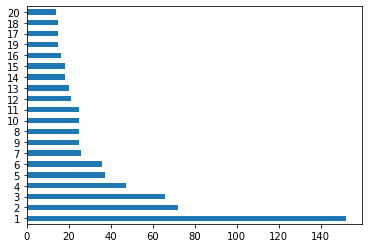

In [33]:
data_baby['target'].value_counts()[:20].plot(kind='barh')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [35]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [36]:
pca = PCA(n_components = 7)

X_yes = pca.fit_transform(X_stand)

pca.explained_variance_ratio_.sum()

1.0000000000000002

In [37]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Run Decisiontree/ KNN/ LogReg
data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [38]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [39]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

Decision Tree Results
accuracy=0.4927536231884058
accuracy=              precision    recall  f1-score   support

           1       0.67      0.71      0.69        42
           2       0.48      0.46      0.47        26
           3       0.55      0.42      0.48        26
           4       0.36      0.45      0.40        11
           5       0.50      0.33      0.40         9
           6       0.32      0.43      0.36        14
           7       1.00      0.57      0.73         7
           8       0.62      0.71      0.67         7
           9       0.25      0.50      0.33         4
          10       0.67      0.67      0.67         9
          11       0.25      0.25      0.25         8
          12       0.29      0.29      0.29         7
          13       0.20      0.12      0.15         8
          14       0.40      0.67      0.50         3
          15       0.00      0.00      0.00         6
          16       0.40      0.67      0.50         3
          17       0.1

In [40]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


KNN Results
accuracy=0.4830917874396135
accuracy=              precision    recall  f1-score   support

           1       0.67      0.71      0.69        42
           2       0.41      0.65      0.51        26
           3       0.45      0.38      0.42        26
           4       0.35      0.55      0.43        11
           5       0.50      0.78      0.61         9
           6       0.38      0.21      0.27        14
           7       0.50      0.57      0.53         7
           8       0.80      0.57      0.67         7
           9       0.33      0.75      0.46         4
          10       0.50      0.56      0.53         9
          11       0.30      0.38      0.33         8
          12       0.00      0.00      0.00         7
          13       0.50      0.25      0.33         8
          14       0.00      0.00      0.00         3
          15       0.50      0.33      0.40         6
          16       0.00      0.00      0.00         3
          17       0.00      0.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


decision tree was a bit better but both preformed poorly 
conclusion: papers don't matter.

# Pair plots

In [41]:


import seaborn as sns

# Pairplot rock name
#sns.pairplot(data_baby,hue = 'ROCK NAME',diag_kind="hist")

In [42]:
# Pairplot papers
#sns.pairplot(data_baby,hue = 'REFERENCE',diag_kind="hist")


In [43]:
# Pairplot SiO2
#sns.pairplot(data_baby,hue = 'SIO2',diag_kind="hist")


In [44]:
# One sample in Peru one sample in southern Chile

# Plotting top 10 papers with the most samples on map

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
data_baby = data_baby.loc[:,['LATITUDE', 'LONGITUDE', 'target']]
#print(data_baby)


<ipython-input-44-898d210741e8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE'].map(target)
<ipython-input-44-898d210741e8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].fillna(0)
<ipython-input-44-898d210741e8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [45]:
import seaborn as sns

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_baby =data_baby[data_baby['target'] >=1]
data_baby

#sns.pairplot(data_baby,hue = 'target',diag_kind="hist")

<ipython-input-45-697cea77b944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE'].map(target)
<ipython-input-45-697cea77b944>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].fillna(0)
<ipython-input-45-697cea77b944>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

SAMPLE ID  SOURCE  \
186                   CG 81A  GEOROC   
187        REAL GRANDE WHITE  GEOROC   
188    MIDDLE MERIHUACA GREY  GEOROC   
191   MIDDLE MERIHUACA WHITE  GEOROC   
192              PITAS WHITE  GEOROC   
...                      ...     ...   
3027                  CG 125  GEOROC   
3029                  CG 140  GEOROC   
3030                  CG 218  GEOROC   
3031                 CG 227B  GEOROC   
3032                  CG 327  GEOROC   

                                              REFERENCE  LATITUDE  LONGITUDE  \
186   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
187   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
188   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
191   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
192   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
...                                                 ...       ...        ...   
3027  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3029  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3030  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3031  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8536   -66.8245   
3032  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   

      LOC PREC MATERIAL      TYPE COMPOSITION   ROCK NAME  ...    CAO   NA2O  \
186       0.01  igneous  volcanic      felsic  rhyodacite  ...  3.304  3.805   
187       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.853  2.307   
188       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.770  1.701   
191       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.940  2.300   
192       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.850  2.601   
...        ...      ...       ...         ...         ...  ...    ...    ...   
3027      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.700  3.100   
3029      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.801  3.401   
3030      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.600  3.300   
3031      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.698  3.197   
3032      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.604  3.406   

        K2O  P2O5     BA     RB     SR    TH     ZR  target  
186   3.605  0.19  436.0  204.8  338.9  17.9  148.9       2  
187   5.818   NaN    NaN    NaN    NaN   NaN    NaN       2  
188   5.702   NaN    NaN    NaN    NaN   NaN    NaN       2  
191   5.399   NaN    NaN    NaN    NaN   NaN    NaN       2  
192   5.902   NaN    NaN    NaN    NaN   NaN    NaN       2  
...     ...   ...    ...    ...    ...   ...    ...     ...  
3027  4.600  0.20  506.0  253.9  269.7  28.6  169.7       2  
3029  4.001  0.22  282.1  255.7  264.1  30.8  169.0       2  
3030  4.200  0.21  253.5  325.2  243.7  31.1  179.8       2  
3031  4.796  0.20  592.5  258.0  295.7  34.0  213.3       2  
3032  4.508  0.24  516.7  261.3  294.4  31.1  173.3       2  

[227 rows x 26 columns]

# # Plotting top 20 papers with the most samples on map

In [46]:
# Plotting top 20 papers with the most samples on map

target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          'ULRICH, T.; HEINRICH, C. A., 2001':16,
          'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          'BENEDINI, L.; GREGORI, D. A., 2013':18,
          'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 20 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
#data_baby = data_baby.loc[:,['LATITUDE', 'LONGITUDE', 'target']]
#print(data_baby)

#gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'South America'].plot(
 #   color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')

#plt.show()

<ipython-input-46-f8d58baf1224>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE'].map(target)
<ipython-input-46-f8d58baf1224>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].fillna(0)
<ipython-input-46-f8d58baf1224>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [47]:
data_baby.drop(['SAMPLE ID','SOURCE','REFERENCE','LOC PREC','MATERIAL',
                'TYPE', 'COMPOSITION', 'ROCK NAME'],
               axis =1, inplace=True)
data_baby

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


LATITUDE  LONGITUDE    SIO2   TIO2   AL2O3   FEOT    MNO    MGO    CAO  \
0     -41.1000   -72.4930  69.144  0.565  14.590  4.261  0.081  1.111  3.544   
1     -41.1000   -72.4930  63.541  0.796  16.427  5.973  0.121  1.732  5.136   
2     -40.5088   -72.2060  70.931  0.340  13.794  4.671  0.140  0.310  1.771   
3     -40.5275   -72.1812  70.047  0.688  14.039  4.367  0.110  0.638  2.154   
4     -40.5675   -72.1743  69.367  0.531  14.150  5.167  0.150  0.471  2.213   
...        ...        ...     ...    ...     ...    ...    ...    ...    ...   
3032  -25.8500   -66.8100  69.618  0.581  15.226  3.005  0.040  0.771  2.604   
3054  -18.1972   -69.2719  72.940  0.351  13.739  1.860  0.040  0.703  1.666   
3056  -18.2167   -69.2125  74.796  0.274  13.367  1.418  0.071  0.478  1.078   
3061  -18.3014   -69.2431  66.728  0.555  17.025  3.542  0.030  0.807  3.845   
3062  -18.2667   -69.3500  75.179  0.129  13.810  0.850  0.072  0.145  1.007   

       NA2O    K2O   P2O5     BA     RB      SR       TH     ZR  target  
0     4.402  2.141  0.162  550.0   69.1   190.0   8.6000  282.0      12  
1     4.562  1.460  0.252  396.0   45.6   294.0   4.3000  195.0      12  
2     5.182  2.791  0.070  747.0   62.0   138.0   8.3000  307.0      11  
3     5.195  2.612  0.150  776.0   73.0   161.0   9.1800  342.0      11  
4     5.167  2.664  0.120  692.0   66.0   197.0   8.8200  308.0      11  
...     ...    ...    ...    ...    ...     ...      ...    ...     ...  
3032  3.406  4.508  0.240  516.7  261.3   294.4  31.1000  173.3       2  
3054  4.095  4.506  0.100  301.0   88.0    99.0  12.9154  118.0       1  
3056  3.680  4.808  0.030  513.0   40.4   512.6   4.0000   73.0       1  
3061  4.087  3.199  0.182  766.0   61.0   508.0   5.0000  101.0       1  
3062  3.738  5.051  0.019  803.0   94.0  1125.0  20.1700  150.0       1  

[943 rows x 18 columns]

In [48]:
# RFE Feature Selection with Cross Validation
# Remove correlated features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold

correlated_features = set()
correlation_matrix = data_baby.drop('target',axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
              

# Running RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold

data_baby = data_baby.dropna()


X = data_baby.drop('target',axis=1)
target = data_baby['target']
target

rfc = RandomForestClassifier(random_state = 42)
rfecv = RFECV(estimator = rfc, step =1 , cv = StratifiedKFold(20), scoring='accuracy')
rfecv.fit(X,target)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 14 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [49]:
print('Optimal number of features {}'.format(rfecv.n_features_))

Optimal number of features 10


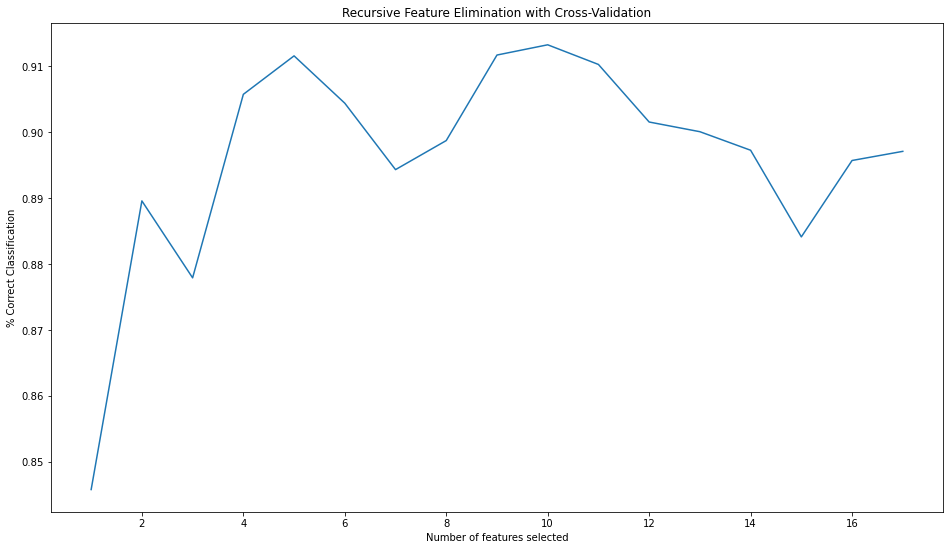

In [50]:
plt.figure(figsize = (16,9))
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()
# never levels out = variables are correlated 


In [51]:
# PCA 2D 

pca = PCA(n_components=3)
pca_result = pca.fit(data_baby)
pca_data = pca.transform(data_baby)

#scaled_data = preprocessing.scale(data_baby.T)
#pca = PCA(n_components = 3)
#pca.fit(scaled_data)
#pca_data = pca.transform(scaled_data)

new = pd.DataFrame()
new['pca-one'] = pca_data[:,0]
new['pca-two'] = pca_data[:,1] 
new['pca-three'] = pca_data[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Shows the first component makes up most of the variation in the entire dataset 

Explained variation per principal component: [0.69788246 0.23078913 0.04114491]


In [52]:
# t-SNE

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#scaled_data = preprocessing.scale(data_baby.T)
pca = PCA(n_components = 3)
pca.fit(data_baby)
pca_data = pca.transform(data_baby)

new = pd.DataFrame()
new['pca-one'] = pca_data[:,0]
new['pca-two'] = pca_data[:,1] 
new['pca-three'] = pca_data[:,2]

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(new)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 688 samples in 0.001s...
[t-SNE] Computed neighbors for 688 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 688 / 688
[t-SNE] Mean sigma: 21.450231
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.220047
[t-SNE] KL divergence after 1000 iterations: 0.346286


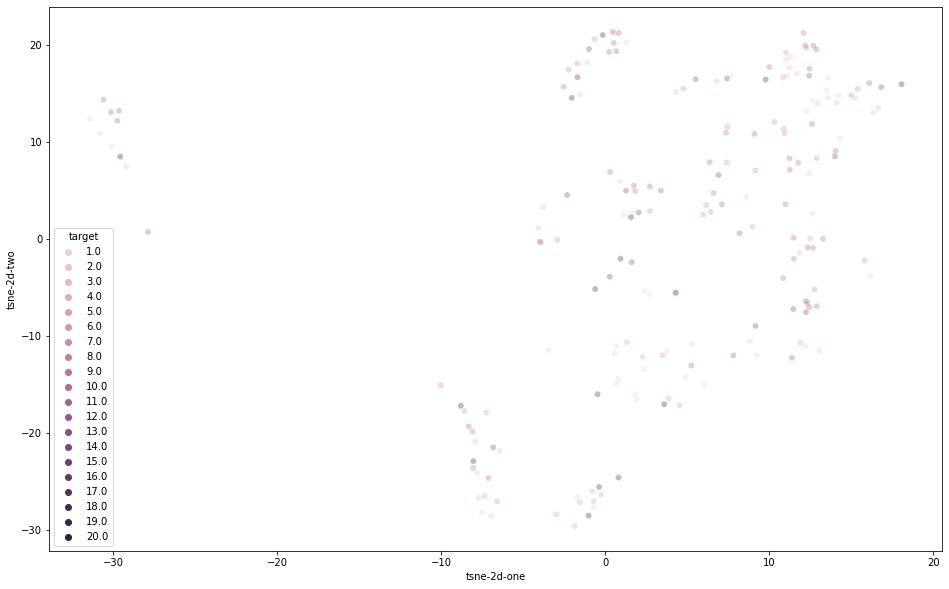

In [53]:

new['tsne-2d-one'] = tsne_results[:,0]
new['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    #palette=sns.color_palette("coolwarm"),
    data=new,
    legend="full",
    alpha=0.3
)

In [54]:
# PCA
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA


scaled_data = preprocessing.scale(data_baby.T)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

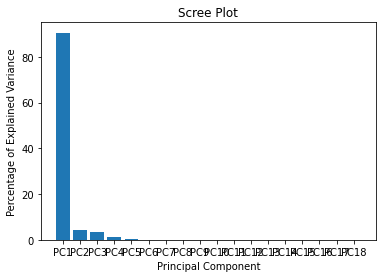

In [55]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals =1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#Almost all of the variation is along PC1
# could do a 2d graph using PC1 and PC2 to represent the original data

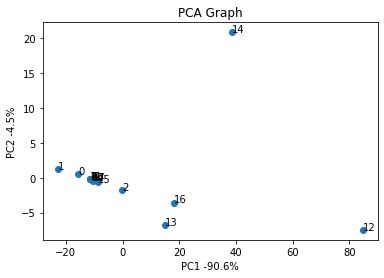

In [56]:
pca_df = pd.DataFrame(pca_data, columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 -{0}%'.format(per_var[0]))
plt.ylabel('PC2 -{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],
                          pca_df.PC2.loc[sample]))
plt.show()


In [57]:
loading_scores = pd.Series(pca.components_[0], index = target)
sorted_loading_scores = loading_scores.abs().sort_values(ascending= False)

top_variable = sorted_loading_scores[0:10].index.values
print(loading_scores[top_variable])
# a lot of samples played a role in separing the samples 

target
13    0.039814
13    0.039972
13    0.039756
13    0.039979
13    0.039707
        ...   
13    0.039908
13    0.039717
13    0.039587
13    0.039469
13    0.039161
Length: 556, dtype: float64


In [58]:
data_baby

LATITUDE  LONGITUDE    SIO2   TIO2   AL2O3   FEOT    MNO    MGO    CAO  \
0     -41.1000   -72.4930  69.144  0.565  14.590  4.261  0.081  1.111  3.544   
1     -41.1000   -72.4930  63.541  0.796  16.427  5.973  0.121  1.732  5.136   
2     -40.5088   -72.2060  70.931  0.340  13.794  4.671  0.140  0.310  1.771   
3     -40.5275   -72.1812  70.047  0.688  14.039  4.367  0.110  0.638  2.154   
4     -40.5675   -72.1743  69.367  0.531  14.150  5.167  0.150  0.471  2.213   
...        ...        ...     ...    ...     ...    ...    ...    ...    ...   
3032  -25.8500   -66.8100  69.618  0.581  15.226  3.005  0.040  0.771  2.604   
3054  -18.1972   -69.2719  72.940  0.351  13.739  1.860  0.040  0.703  1.666   
3056  -18.2167   -69.2125  74.796  0.274  13.367  1.418  0.071  0.478  1.078   
3061  -18.3014   -69.2431  66.728  0.555  17.025  3.542  0.030  0.807  3.845   
3062  -18.2667   -69.3500  75.179  0.129  13.810  0.850  0.072  0.145  1.007   

       NA2O    K2O   P2O5     BA     RB      SR       TH     ZR  target  
0     4.402  2.141  0.162  550.0   69.1   190.0   8.6000  282.0      12  
1     4.562  1.460  0.252  396.0   45.6   294.0   4.3000  195.0      12  
2     5.182  2.791  0.070  747.0   62.0   138.0   8.3000  307.0      11  
3     5.195  2.612  0.150  776.0   73.0   161.0   9.1800  342.0      11  
4     5.167  2.664  0.120  692.0   66.0   197.0   8.8200  308.0      11  
...     ...    ...    ...    ...    ...     ...      ...    ...     ...  
3032  3.406  4.508  0.240  516.7  261.3   294.4  31.1000  173.3       2  
3054  4.095  4.506  0.100  301.0   88.0    99.0  12.9154  118.0       1  
3056  3.680  4.808  0.030  513.0   40.4   512.6   4.0000   73.0       1  
3061  4.087  3.199  0.182  766.0   61.0   508.0   5.0000  101.0       1  
3062  3.738  5.051  0.019  803.0   94.0  1125.0  20.1700  150.0       1  

[688 rows x 18 columns]

In [59]:
# PCA 2D

X = data_baby

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data_baby['target'])
fig.show()

In [60]:
# PCA in 3D

X = data_baby


pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data_baby['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

<ipython-input-61-88747cbd8d94>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 480x480 with 0 Axes>

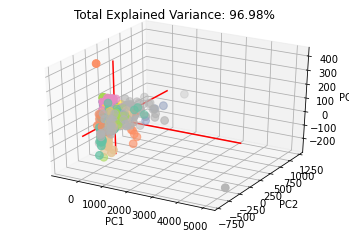

In [61]:
# PCA in 3D

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'species' column appart + make it numeric for coloring
data_baby['taret']=pd.Categorical(data_baby['target'])
my_color=data_baby['target'] #.cat.codes
df = data_baby.drop('target', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
total_var = pca.explained_variance_ratio_.sum() * 100

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title(f'Total Explained Variance: {total_var:.2f}%')
plt.show()

In [62]:
data_baby

LATITUDE  LONGITUDE    SIO2   TIO2   AL2O3   FEOT    MNO    MGO    CAO  \
0     -41.1000   -72.4930  69.144  0.565  14.590  4.261  0.081  1.111  3.544   
1     -41.1000   -72.4930  63.541  0.796  16.427  5.973  0.121  1.732  5.136   
2     -40.5088   -72.2060  70.931  0.340  13.794  4.671  0.140  0.310  1.771   
3     -40.5275   -72.1812  70.047  0.688  14.039  4.367  0.110  0.638  2.154   
4     -40.5675   -72.1743  69.367  0.531  14.150  5.167  0.150  0.471  2.213   
...        ...        ...     ...    ...     ...    ...    ...    ...    ...   
3032  -25.8500   -66.8100  69.618  0.581  15.226  3.005  0.040  0.771  2.604   
3054  -18.1972   -69.2719  72.940  0.351  13.739  1.860  0.040  0.703  1.666   
3056  -18.2167   -69.2125  74.796  0.274  13.367  1.418  0.071  0.478  1.078   
3061  -18.3014   -69.2431  66.728  0.555  17.025  3.542  0.030  0.807  3.845   
3062  -18.2667   -69.3500  75.179  0.129  13.810  0.850  0.072  0.145  1.007   

       NA2O    K2O   P2O5     BA     RB      SR       TH     ZR  target taret  
0     4.402  2.141  0.162  550.0   69.1   190.0   8.6000  282.0      12    12  
1     4.562  1.460  0.252  396.0   45.6   294.0   4.3000  195.0      12    12  
2     5.182  2.791  0.070  747.0   62.0   138.0   8.3000  307.0      11    11  
3     5.195  2.612  0.150  776.0   73.0   161.0   9.1800  342.0      11    11  
4     5.167  2.664  0.120  692.0   66.0   197.0   8.8200  308.0      11    11  
...     ...    ...    ...    ...    ...     ...      ...    ...     ...   ...  
3032  3.406  4.508  0.240  516.7  261.3   294.4  31.1000  173.3       2     2  
3054  4.095  4.506  0.100  301.0   88.0    99.0  12.9154  118.0       1     1  
3056  3.680  4.808  0.030  513.0   40.4   512.6   4.0000   73.0       1     1  
3061  4.087  3.199  0.182  766.0   61.0   508.0   5.0000  101.0       1     1  
3062  3.738  5.051  0.019  803.0   94.0  1125.0  20.1700  150.0       1     1  

[688 rows x 19 columns]

Red line highlights dimensions
PC2 seems to have a long point

In [63]:
data_baby.columns

Index(['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target',
       'taret'],
      dtype='object')

In [64]:
# Visualize all the principal components

import plotly.express as px
from sklearn.decomposition import PCA


data_baby
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

pca = PCA()
components = pca.fit_transform(data_baby[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data_baby["target"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Four separated samples 

In [65]:

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_four = data_four[data_four['target'] >=1]
data_four



SAMPLE ID  SOURCE  \
186                   CG 81A  GEOROC   
187        REAL GRANDE WHITE  GEOROC   
188    MIDDLE MERIHUACA GREY  GEOROC   
191   MIDDLE MERIHUACA WHITE  GEOROC   
192              PITAS WHITE  GEOROC   
...                      ...     ...   
3027                  CG 125  GEOROC   
3029                  CG 140  GEOROC   
3030                  CG 218  GEOROC   
3031                 CG 227B  GEOROC   
3032                  CG 327  GEOROC   

                                              REFERENCE  LATITUDE  LONGITUDE  \
186   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
187   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
188   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
191   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
192   FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.9800   -67.2100   
...                                                 ...       ...        ...   
3027  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3029  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3030  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   
3031  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8536   -66.8245   
3032  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...  -25.8500   -66.8100   

      LOC PREC MATERIAL      TYPE COMPOSITION   ROCK NAME  ...    CAO   NA2O  \
186       0.01  igneous  volcanic      felsic  rhyodacite  ...  3.304  3.805   
187       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.853  2.307   
188       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.770  1.701   
191       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.940  2.300   
192       0.01  igneous  volcanic      felsic  rhyodacite  ...  0.850  2.601   
...        ...      ...       ...         ...         ...  ...    ...    ...   
3027      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.700  3.100   
3029      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.801  3.401   
3030      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.600  3.300   
3031      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.698  3.197   
3032      0.01  igneous  volcanic      felsic  rhyodacite  ...  2.604  3.406   

        K2O  P2O5     BA     RB     SR    TH     ZR  target  
186   3.605  0.19  436.0  204.8  338.9  17.9  148.9       2  
187   5.818   NaN    NaN    NaN    NaN   NaN    NaN       2  
188   5.702   NaN    NaN    NaN    NaN   NaN    NaN       2  
191   5.399   NaN    NaN    NaN    NaN   NaN    NaN       2  
192   5.902   NaN    NaN    NaN    NaN   NaN    NaN       2  
...     ...   ...    ...    ...    ...   ...    ...     ...  
3027  4.600  0.20  506.0  253.9  269.7  28.6  169.7       2  
3029  4.001  0.22  282.1  255.7  264.1  30.8  169.0       2  
3030  4.200  0.21  253.5  325.2  243.7  31.1  179.8       2  
3031  4.796  0.20  592.5  258.0  295.7  34.0  213.3       2  
3032  4.508  0.24  516.7  261.3  294.4  31.1  173.3       2  

[227 rows x 26 columns]

In [66]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data_four['target'])
fig.show()

In [67]:
# PCA in 3D

X = data_four[features]


pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data_four['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [68]:
# Visualize all the principal components

import plotly.express as px
from sklearn.decomposition import PCA


data_four
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

pca = PCA()
components = pca.fit_transform(data_four[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data_four["target"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [69]:
# What Model should we use, KNN or DecisionTrees?

y = data_four['target']
X = data_four[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

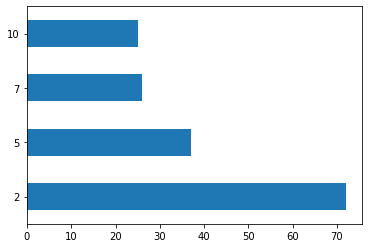

In [70]:
data_four['target'].value_counts()[:20].plot(kind='barh')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [72]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [73]:
pca = PCA(n_components = 7)

X_yes = pca.fit_transform(X_stand)

pca.explained_variance_ratio_.sum()

1.0

In [74]:
# Run Decisiontree/ KNN/ LogReg
data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [75]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [76]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

Decision Tree Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           7       1.00      0.83      0.91         6
          10       0.92      1.00      0.96        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [77]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


KNN Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       0.93      1.00      0.97        14
           7       1.00      0.83      0.91         6
          10       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [78]:
data_four

SAMPLE ID  SOURCE                                          REFERENCE  \
186     CG 81A  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
197     CG 157  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
198    CG 136A  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
201     CG 86A  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
205     CG475G  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
...        ...     ...                                                ...   
3027    CG 125  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3029    CG 140  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3030    CG 218  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3031   CG 227B  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   
3032    CG 327  GEOROC  FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...   

      LATITUDE  LONGITUDE  LOC PREC MATERIAL      TYPE COMPOSITION  \
186   -25.9800   -67.2100      0.01  igneous  volcanic      felsic   
197   -25.9800   -67.2100      0.01  igneous  volcanic      felsic   
198   -25.9800   -67.2100      0.01  igneous  volcanic      felsic   
201   -25.9800   -67.2100      0.01  igneous  volcanic      felsic   
205   -25.9800   -67.2100      0.01  igneous  volcanic      felsic   
...        ...        ...       ...      ...       ...         ...   
3027  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   
3029  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   
3030  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   
3031  -25.8536   -66.8245      0.01  igneous  volcanic      felsic   
3032  -25.8500   -66.8100      0.01  igneous  volcanic      felsic   

       ROCK NAME  ...    CAO   NA2O    K2O  P2O5     BA     RB     SR    TH  \
186   rhyodacite  ...  3.304  3.805  3.605  0.19  436.0  204.8  338.9  17.9   
197   rhyodacite  ...  2.496  2.795  5.290  0.20  496.1  278.2  266.2  25.0   
198   rhyodacite  ...  2.299  3.198  4.398  0.22  504.7  247.3  256.5  28.5   
201   rhyodacite  ...  2.503  3.103  5.006  0.16  587.9  233.8  285.9  21.8   
205   rhyodacite  ...  2.500  3.300  4.600  0.18  407.3  258.8  260.4  23.1   
...          ...  ...    ...    ...    ...   ...    ...    ...    ...   ...   
3027  rhyodacite  ...  2.700  3.100  4.600  0.20  506.0  253.9  269.7  28.6   
3029  rhyodacite  ...  2.801  3.401  4.001  0.22  282.1  255.7  264.1  30.8   
3030  rhyodacite  ...  2.600  3.300  4.200  0.21  253.5  325.2  243.7  31.1   
3031  rhyodacite  ...  2.698  3.197  4.796  0.20  592.5  258.0  295.7  34.0   
3032  rhyodacite  ...  2.604  3.406  4.508  0.24  516.7  261.3  294.4  31.1   

         ZR  target  
186   148.9       2  
197   159.2       2  
198   178.7       2  
201   155.5       2  
205   133.6       2  
...     ...     ...  
3027  169.7       2  
3029  169.0       2  
3030  179.8       2  
3031  213.3       2  
3032  173.3       2  

[160 rows x 26 columns]

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y = data_four['target']
X = data_four[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.31
|   |--- class: 5
|--- feature_1 >  0.31
|   |--- feature_6 <= 4.27
|   |   |--- class: 2
|   |--- feature_6 >  4.27
|   |   |--- feature_2 <= 15.76
|   |   |   |--- feature_3 <= 3.41
|   |   |   |   |--- class: 7
|   |   |   |--- feature_3 >  3.41
|   |   |   |   |--- class: 10
|   |   |--- feature_2 >  15.76
|   |   |   |--- class: 7



In [80]:
data_four_plot = data_four[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O','target']]


In [81]:
# Kmeans on 4 references 

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_four_plot)
 
df.shape

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

core = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
#
print('Silhouette Score: %.3f' % score)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Silhouette Score: 0.055


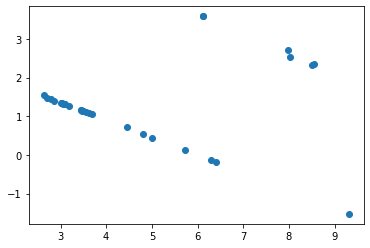

In [82]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

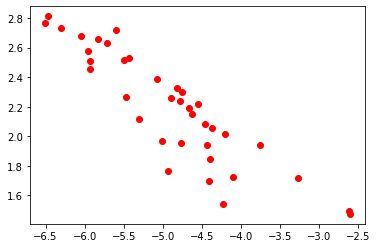

In [83]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

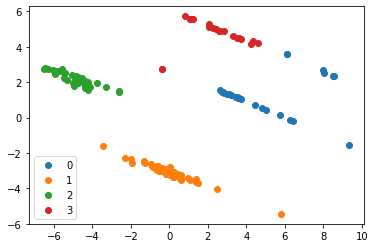

In [84]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

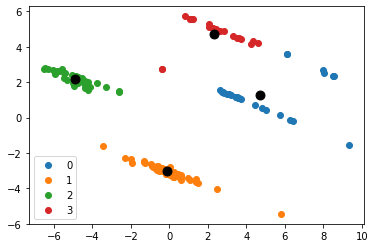

In [85]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [86]:
centroids

array([[ 4.73052801,  1.28571639],
       [-0.12427146, -3.04551118],
       [-4.91119422,  2.19572969],
       [ 2.32123291,  4.73634833]])

In [87]:
# Calculate Silhoutte Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
#
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.721


# Kmeans on top 20 references

In [88]:
# Kmeans on top 20 references 

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_baby)
 
df.shape

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 20, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[17 16  2  2  2 14  2  2  2 17  2 11  7  0 13 11 11  1 12  2 17  9 11 11
 13 13 12  0 19 19 11 11 19  5  8  6 11 14 19  1 16 16 16 16 16 16 17 10
  1  1  1 16 17 16 17 16 17 10 16 16 16 16 16 16 17 16 17 19 16 10 17 17
 16  3 10  2  2  2  2  2  2  2  2  2 14  2  2  2  2  2 17  2  2 17  2  2
  2  2  2  2  2 17 17  2  2  2  2  2 17  2  2  2 17 17  2  2 17  2 17  2
  2  2 17  2  2  2 17 17  2  2  2  2  2 17 17 17 17 17 17 17  6 17 17 17
 17 17 17  2 17 17 17 17  2 17 17 17 17  2 17 17 17 17 17 17 17  2 17 17
 17 17 10 17 17 17 17 17 17 17 14  9  9  6  9  2 19  2  9 10  9  9 14  9
  7  7  9  2  9  2  8 14 13  8 12  8  8  6 11  8 12 10 10 12 17 14  2  7
 19  2  0 12  7  1 11 13 19  8 19 11  8  9 11  8  6 13 12  8  6 10 11 19
 10  8 19 14 19  6  5 19 13  6 16 17 17 17 17 17 17 17 17 17 16 16  6  6
  6 16 16 16 16  6 16  6  6  6 16  6  6 16 10  6  6  6  6  6  6 16  6  3
  6  6  2 17 14 19 10  5  0  5 19  6 17  2  0  9 13 14 13  7  9  7  9  6
  8  7 10 14 14 10 10 17 10 10 13 10 10 17 10 10 10

In [89]:
data_baby.describe()

LATITUDE   LONGITUDE        SIO2        TIO2       AL2O3        FEOT  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean   -26.024834  -69.211913   69.326084    0.535660   15.171285    3.177969   
std      7.765366    2.073099    3.725916    0.207044    1.151789    1.317539   
min    -41.100000  -74.515600   56.763000    0.041000   11.455000    0.440000   
25%    -27.400000  -71.287900   66.493500    0.445750   14.488000    2.579750   
50%    -25.836750  -69.050000   68.990000    0.573000   15.294500    3.100500   
75%    -18.358350  -67.210000   70.791250    0.654000   15.979750    4.045000   
max    -14.089000  -66.296600   81.971000    1.080000   19.419000    7.355000   

              MNO         MGO         CAO        NA2O         K2O        P2O5  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     0.074549    1.124214    2.735949    3.821682    3.866083    0.166522   
std      0.082377    0.662322    1.215259    0.894633    0.966837    0.080180   
min      0.010000    0.020000    0.021000    0.160000    1.460000    0.010000   
25%      0.050000    0.629000    2.159250    3.257500    3.112750    0.120000   
50%      0.062000    1.103500    2.658500    3.682000    3.919000    0.179000   
75%      0.091000    1.540500    3.635250    4.503000    4.506500    0.214000   
max      2.062000    4.184000    7.721000    5.648000    8.309000    0.444000   

                BA          RB           SR          TH          ZR  \
count   688.000000  688.000000   688.000000  688.000000  688.000000   
mean    656.032067  151.985817   342.292081   15.724134  185.571554   
std     301.022475   80.094909   231.187982    9.043624   76.695909   
min      42.000000   20.000000     9.000000    0.000000   34.000000   
25%     502.000000   89.000000   208.750000    8.287737  135.000000   
50%     612.500000  131.500000   289.800000   13.720000  177.227000   
75%     744.250000  213.000000   420.500000   23.100000  222.000000   
max    5202.000000  722.000000  2564.000000   48.600000  711.000000   

           target  
count  688.000000  
mean     6.678779  
std      5.662771  
min      1.000000  
25%      2.000000  
50%      5.000000  
75%     11.000000  
max     20.000000

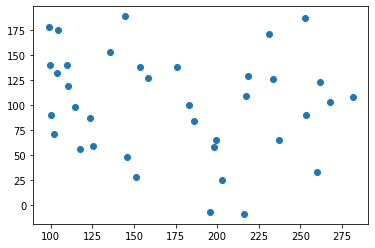

In [90]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

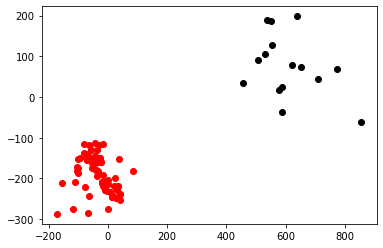

In [91]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

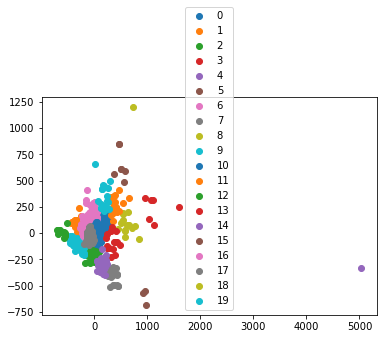

In [92]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

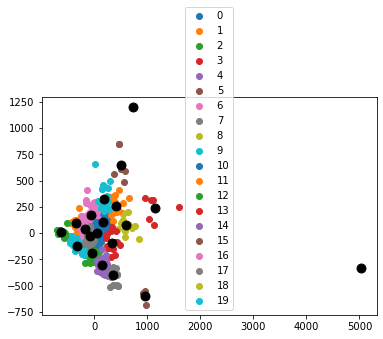

In [93]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [94]:
# Calculate Silhoutte Score

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
#
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.426


In [95]:
#Hierarchical Clustering Algorithms

[Text(169.34917378597123, 211.4, 'X[6] <= 3.964\ngini = 0.909\nsamples = 688\nvalue = [152, 72, 66, 47, 37, 36, 26, 25, 25, 25, 25, 21\n20, 18, 18, 16, 15, 15, 15, 14]'),
 Text(74.72721447841727, 199.32, 'X[1] <= 0.438\ngini = 0.897\nsamples = 411\nvalue = [50, 71, 64, 43, 22, 35, 0, 25, 25, 0, 0, 0, 17\n11, 0, 16, 10, 12, 10, 0]'),
 Text(18.215287769784176, 187.24, 'X[5] <= 0.483\ngini = 0.769\nsamples = 99\nvalue = [39, 2, 2, 9, 22, 0, 0, 0, 0, 0, 0, 0, 0, 7\n0, 0, 5, 9, 4, 0]'),
 Text(3.2115107913669068, 175.16, 'X[6] <= 2.077\ngini = 0.46\nsamples = 10\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 7, 2, 0]'),
 Text(1.6057553956834534, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 2, 0]'),
 Text(4.81726618705036, 163.07999999999998, 'X[3] <= 0.833\ngini = 0.219\nsamples = 8\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 7, 0, 0]'),
 Text(3.2115107913669068, 151.0, 'gini = 0.0\nsamples = 1\nva

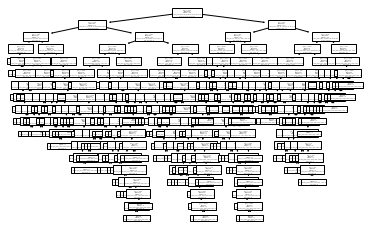

In [96]:
# DecisionTree for top 20 references 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
#print(text_representation)

tree.plot_tree(clf)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.14766430880905654
For n_clusters = 4 The average silhouette_score is : 0.20485939606200596
For n_clusters = 6 The average silhouette_score is : 0.30424584291669704
For n_clusters = 8 The average silhouette_score is : 0.37213508958750274
For n_clusters = 10 The average silhouette_score is : 0.4462251778862265
For n_clusters = 12 The average silhouette_score is : 0.5241839497153187
For n_clusters = 14 The average silhouette_score is : 0.5921883524948999
For n_clusters = 16 The average silhouette_score is : 0.6600910148157291
For n_clusters = 18 The average silhouette_score is : 0.724019328180394
For n_clusters = 20 The average silhouette_score is : 0.7818123735219417


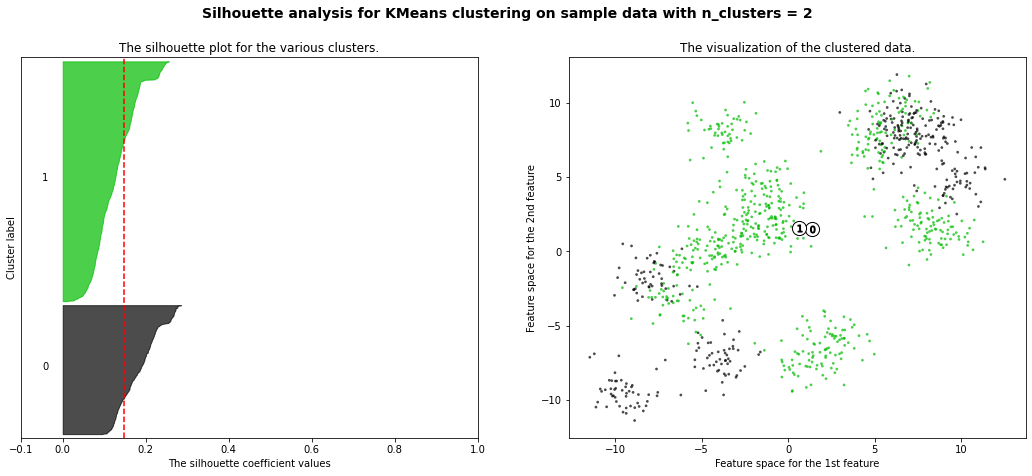

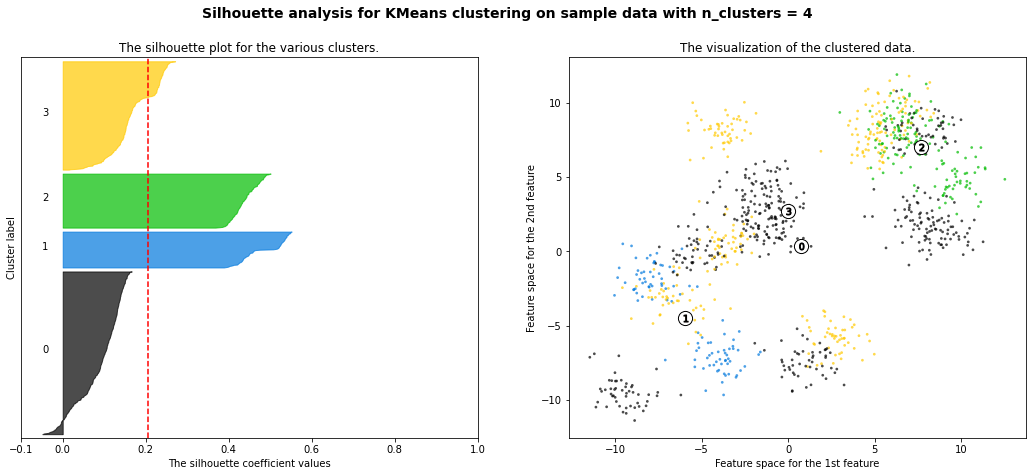

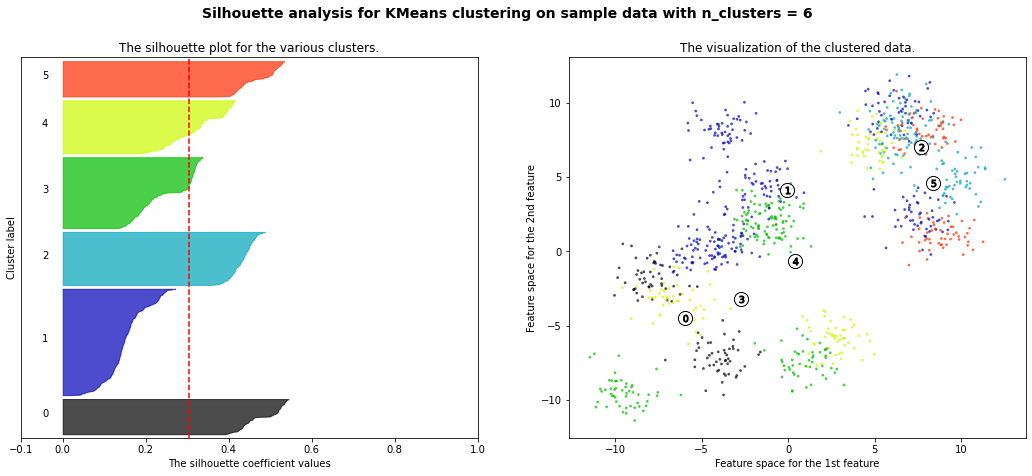

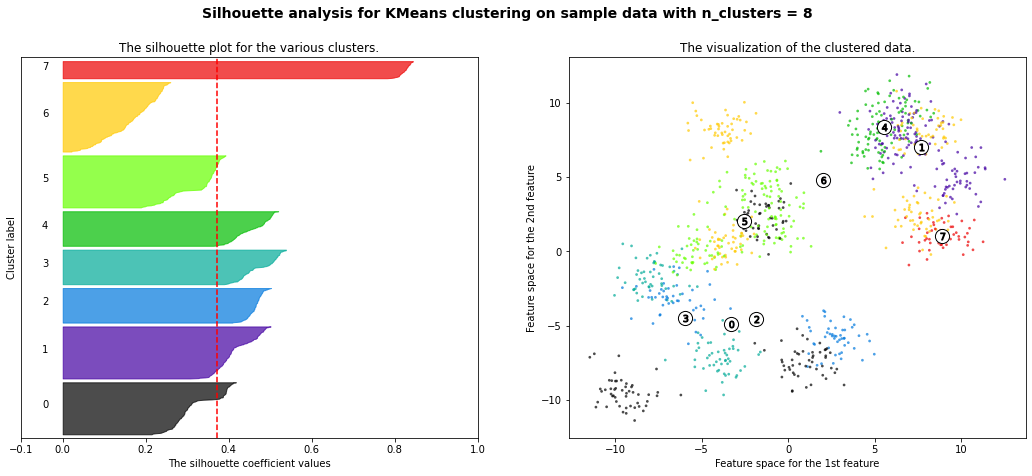

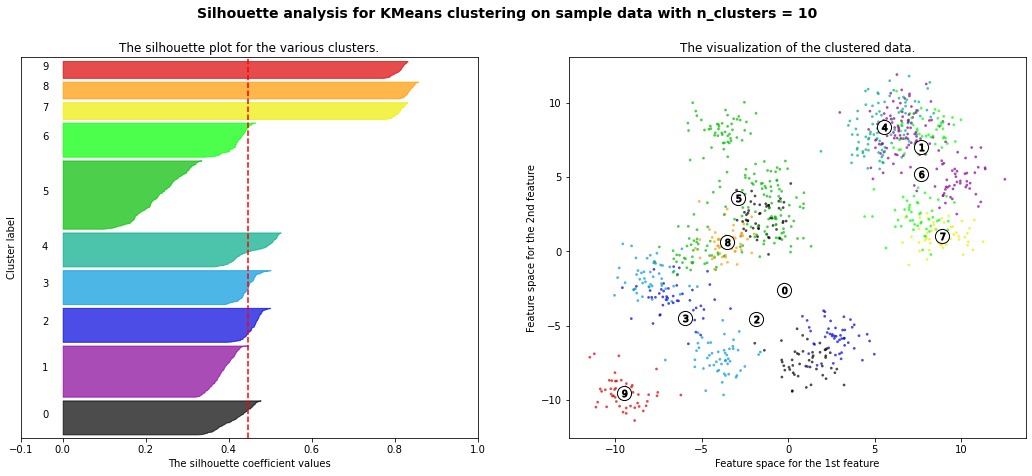

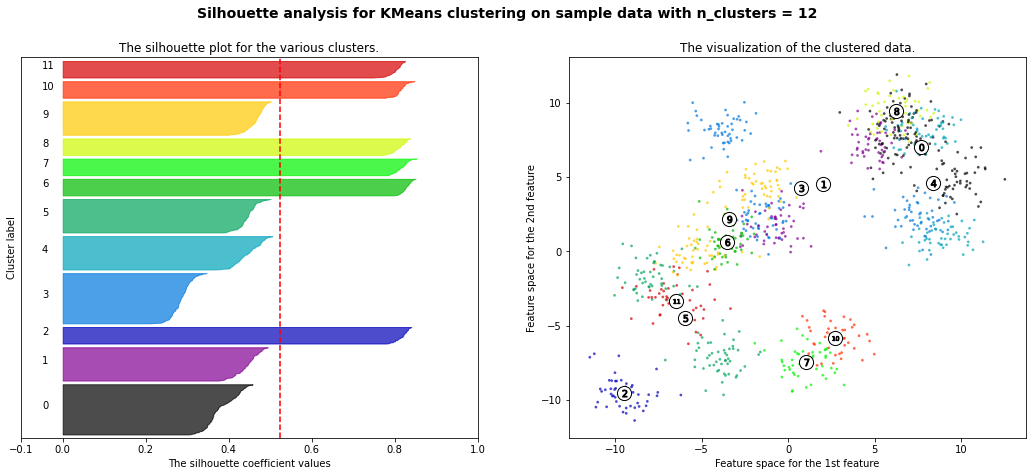

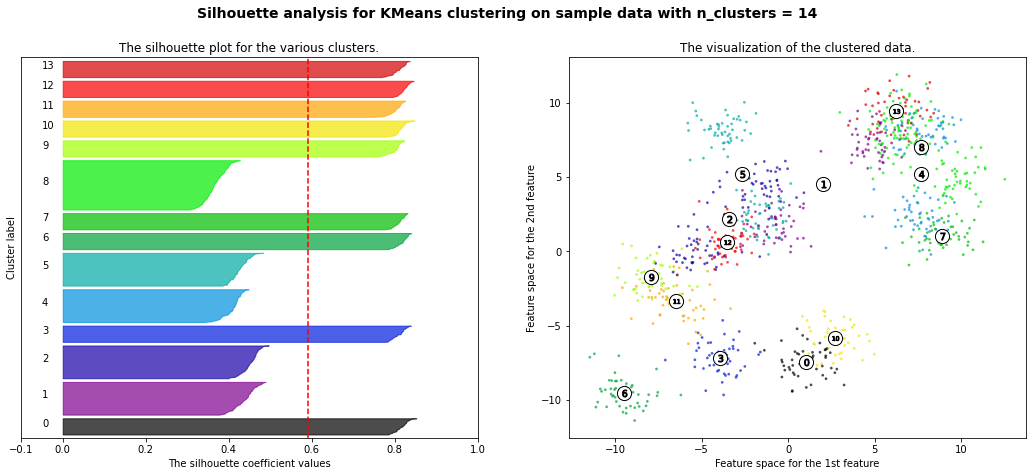

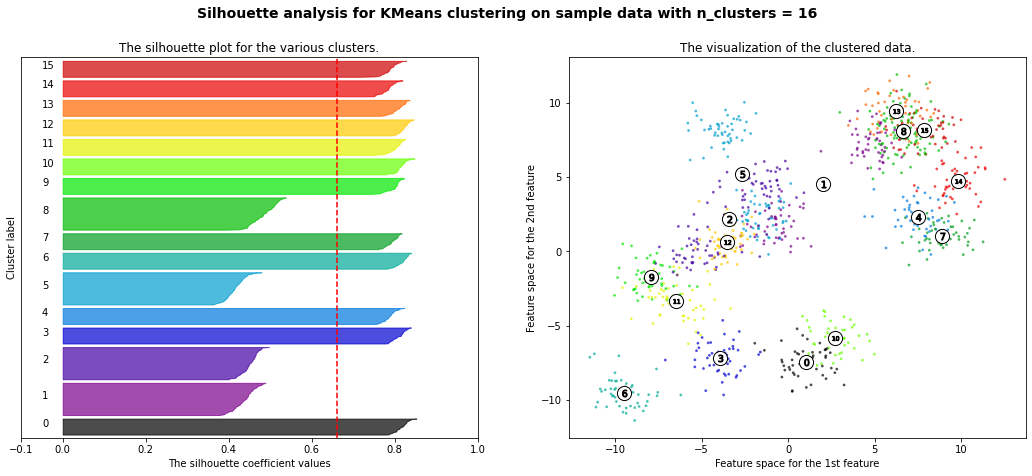

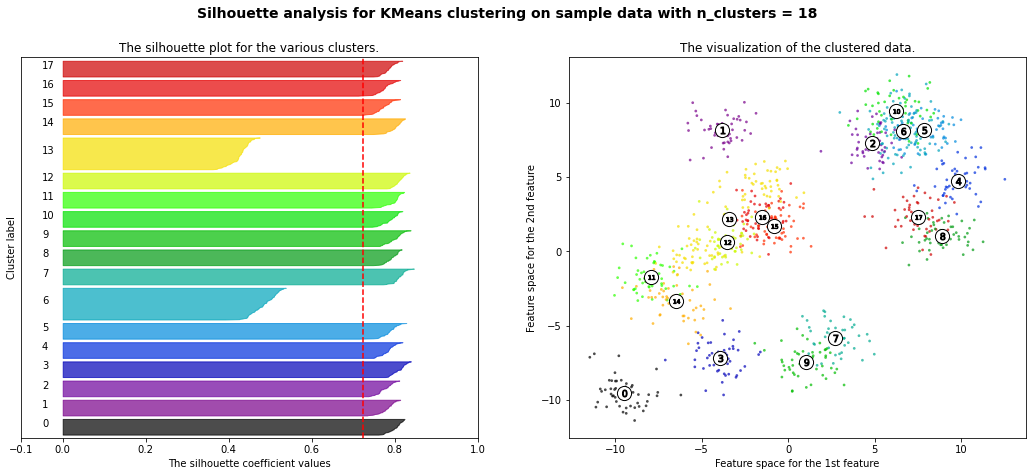

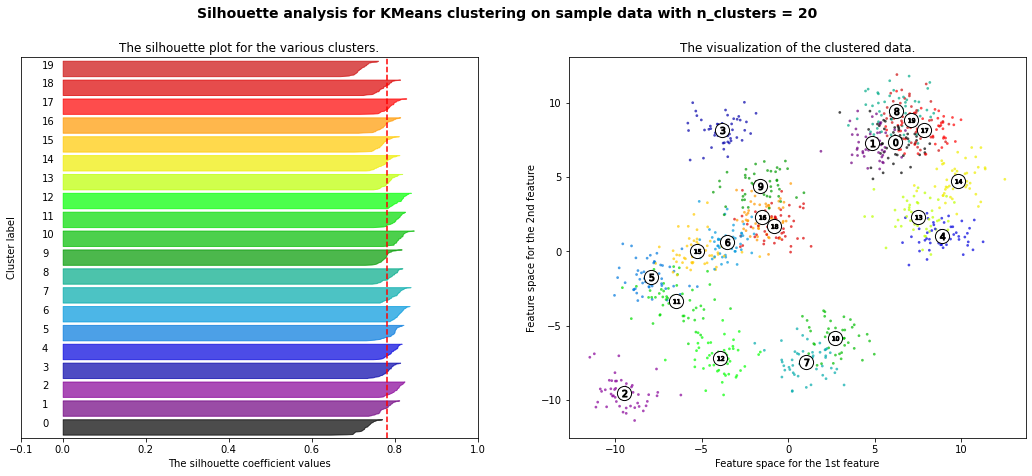

In [97]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=1000,
                  n_features=20,
                  centers=20,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 4, 6,8, 10,12,14,16,18,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [98]:
silhouette_score(X, kmeans.labels_)

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

ValueError: Found input variables with inconsistent numbers of samples: [1000, 688]

# Plotting top 10 papers with the most samples on map/ Big Cluster

In [ ]:
# Plotting 10 papers with the most samples on map

target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          #'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          #'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_ten = df

data_ten['target']= data_ten['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_ten['target'] = data_ten['target'].fillna(0)
# Make target column int
data_ten['target'] = data_ten['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
data_ten = data_ten[data_ten['target'] >=1]
data_ten

In [ ]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_ten= data_ten.dropna()

X = data_ten[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data_ten['target'])
fig.show()

In [ ]:
# PCA in 3D

X = data_ten[features]


pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data_ten['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Visualize all the principal components

import plotly.express as px
from sklearn.decomposition import PCA


data_ten
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

pca = PCA()
components = pca.fit_transform(data_ten[features])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=data_ten["target"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Pairplot cluster ( Peru/Bolivia/Chile)

In [ ]:
# Pairplot cluster ( Peru/Bolivia/Chile)
import seaborn as sns

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_baby =data_baby[data_baby['target'] >=1]
data_baby

#sns.pairplot(data_baby,hue = 'ROCK NAME',diag_kind="hist")


# # Finding an Algorithm for Peru/Bolivia/Chile cluster 

In [ ]:
# Finding an Algorithm for Peru/Bolivia/Chile cluster 
data_baby = data_baby.dropna()
y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [ ]:
pca = PCA(n_components = 7)
X_yes = pca.fit_transform(X_stand)
pca.explained_variance_ratio_.sum()

In [ ]:
# Run Decisiontree/ KNN/ LogReg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [ ]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [ ]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

In [ ]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


# One sample in Peru one sample in southern Chile

# Pairplot cluster ( Peru vs. southern Chile)

In [ ]:
# Pairplot cluster ( Peru vs. southern Chile)
import seaborn as sns

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_baby =data_baby[data_baby['target'] >=1]
data_baby

#sns.pairplot(data_baby,hue = 'target',diag_kind="hist")

# # Finding an Algorithm for Peru vs. Southern Chile 

In [ ]:
# Finding an Algorithm for Peru vs. Southern Chile 
data_baby = data_baby.dropna()
y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

len(X)

In [ ]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

pca = PCA(n_components = 7)
X_yes = pca.fit_transform(X_stand)
pca.explained_variance_ratio_.sum()

In [ ]:
# Run Decisiontree/ KNN/ LogReg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [ ]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [ ]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

In [ ]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')
